# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 12 Task 1 - Machine Learning Pipeline
### Assignment by: Kat Weissman

#### Objectives:

- Use pipelines and grid search
- Perform text mining

*Recommended learning resources:*
- https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
- https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/
- https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn import metrics


### Level 1
### Exercise 1 
Grab the data set you want and do a pipeline and a gridsearch using the Random Forest algorithm.

I will do this exercise using a data set and the recommended pre-processing steps in the Random Forests lab session provided by the UPC Master's of Data Science Machine Learning Course, which I started in February 2022.

- Course syllabus: https://www.fib.upc.edu/en/studies/masters/master-innovation-and-research-informatics/curriculum/syllabus/ML-MDS
- Course website: https://www.cs.upc.edu/~mmartin/ml-mds.html

The dataset is of direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict wheather the client will subscribe a term deposit.

In [2]:
df = pd.read_csv("bank-full.csv.gz", header=0, delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We can see from the data sample and list of data types that we have a variety of numerical and categorical data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

We need to one-hot encode categorical columns in order to work with the random forest algorithm, so we need to identify them as categories.

In [5]:
categorical_columns = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
    'month', 'poutcome'
]

# change data type to category for categorical features
df[categorical_columns] = df[categorical_columns].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  object  
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


Using the "include='all'" argument in the pandas describe function includes categorical features in addition to numerical features.

In [7]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Imbalanced data can pose a problem for classification, so we need to check the counts of values in each categorical feature. The value counts seem ok for each variable.

In [8]:
for c in categorical_columns:
    print('Feature:',c)
    print(df[c].value_counts())
    print()

Feature: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Feature: marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Feature: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Feature: default
no     44396
yes      815
Name: default, dtype: int64

Feature: housing
yes    25130
no     20081
Name: housing, dtype: int64

Feature: loan
no     37967
yes     7244
Name: loan, dtype: int64

Feature: contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Feature: month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
d

We can check the histograms of numerical features. We use 'y' as the hue since it is the target variable. This is helpful, because during visualization, we can see that age may be an important feature.

<AxesSubplot:xlabel='age', ylabel='Count'>

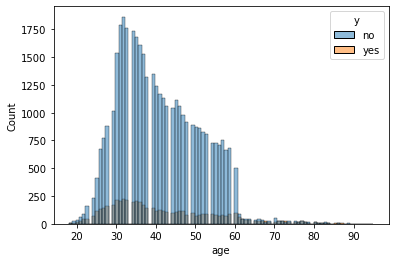

In [9]:
sns.histplot(x='age',hue='y',data=df)

Since duration is skewed to the right, we can try applying a power transformation to make the data more normal.

<AxesSubplot:xlabel='duration', ylabel='Count'>

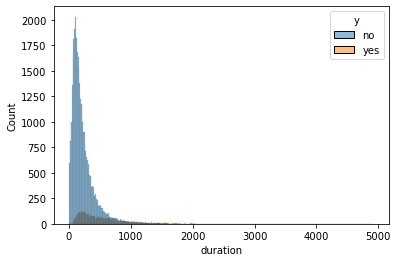

In [10]:
sns.histplot(x='duration',hue='y',data=df)

In [11]:
pt = PowerTransformer()

In [12]:
duration_powerT = pt.fit_transform(np.array(df.duration).reshape(-1, 1))

The power transformation is successful as seen in the plot:

<AxesSubplot:ylabel='Count'>

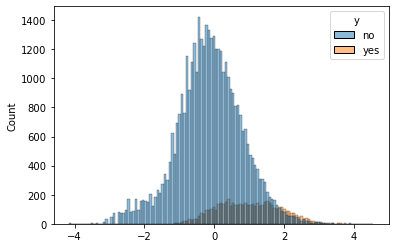

In [13]:
sns.histplot(x=duration_powerT.flatten(),hue=df.y)

#### Defining the Pipeline

We have identified two pre-processing tasks for our dataset, although others could be incorporated into the pipeline at a later time if needed or recommended from experts.

1. Apply power transformation to duration so it is more normally distributed
2. One-hot encode the categorical variables

In [18]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


We use a column transformer to apply the required transformations to specific columns. Once the column transformer is built, we can use it in the pipeline.

References:
- https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=column%20transformer#
- https://scikit-learn.org/stable/modules/compose.html#column-transformer

In [19]:
# create column transformer
ct = ColumnTransformer([('onehot', OneHotEncoder(),
                         make_column_selector(dtype_include='category')), # one-hot encode categorical columns
                        ('powerTrans', PowerTransformer(), ['duration'])],
                       remainder='passthrough',
                       verbose_feature_names_out=False)

In [20]:
# separate the target variable 
X = df.drop(columns=['y'])
y = df['y']

In [21]:
# randomly split the data into train and test
train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.2,random_state=324)

In our pipeline, we are using the pre_processing steps defined in the column transformer and a random forest classifier.

In [25]:
# define pipeline
model_pipeline = Pipeline(steps=[('pre_processing', ct),
                                 ('random_forest', RandomForestClassifier(random_state=324))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
model_pipeline.predict(train_x)

array(['yes', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [26]:
# predict target variables on the test data 
y_pred = model_pipeline.predict(test_x)

In [27]:
def evaluateModel(y_test, y_pred):
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Balanced Accuracy:",metrics.balanced_accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))

The balanced accuracy of the model is not very good, which could be due to imbalanced classes of the target variable.

In [28]:
# confusion matrix
evaluateModel(test_y,y_pred)

[[7742  222]
 [ 656  423]]
Accuracy: 0.9029083268826716
Balanced Accuracy: 0.6820771088061243
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7964
         yes       0.66      0.39      0.49      1079

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



#### Tuning the hyper-parameters with Grid Search

We can see which parameters we can tune by using the get_params() method.

I will try to adjust the following Random Forest Classifier parameters with grid search:
1. n_estimators
2. max_features
3. max_depth

Reference:
 - https://scikit-learn.org/stable/modules/grid_search.html#grid-search
 - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
 - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
 - https://scikit-learn.org/stable/modules/ensemble.html#forest

In [29]:
# keys and vaules for classifier parameters
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
# keys and vaules for pipeline parameters
model_pipeline.get_params()

{'memory': None,
 'steps': [('pre_processing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa88a28a00>),
                                   ('powerTrans', PowerTransformer(),
                                    ['duration'])],
                     verbose_feature_names_out=False)),
  ('random_forest', RandomForestClassifier(random_state=324))],
 'verbose': False,
 'pre_processing': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot', OneHotEncoder(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa88a28a00>),
                                 ('powerTrans', PowerTransformer(),
                                  ['duration'])],
                   verbose_feature_names_out=False),
 'random_forest': RandomForestClassifier(random

In [33]:
# set parameters
parameters = {'random_forest__n_estimators':[100,200],
              'random_forest__max_features':[2,3,4],
              'random_forest__max_depth':[20,30,50]}

In [34]:
grid = GridSearchCV(model_pipeline, param_grid=parameters, cv=5)

The best performing model is the most complex model that I defined in the grid search, which indicates that there could be better models that are more complex for this data.

In [35]:
grid.fit(train_x, train_y)
print ("score = %3.2f" %(grid.score(test_x,test_y)))
print (grid.best_params_)

score = 0.90
{'random_forest__max_depth': 50, 'random_forest__max_features': 4, 'random_forest__n_estimators': 200}


We can create and evaluate a model using the best parameters found by the grid search.

In [38]:
bestRF = RandomForestClassifier(random_state=324, max_depth=50, max_features=4, n_estimators=200)

In [39]:
model_pipeline = Pipeline(steps=[('pre_processing', ct),
                                 ('random_forest', bestRF)
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ffa88a28a00>),
                                                 ('powerTrans',
                                                  PowerTransformer(),
                                                  ['duration'])],
                                   verbose_feature_names_out=False)),
                ('random_forest',
                 RandomForestClassifier(max_depth=50, max_features=4,
                                        n_estimators=200, random_state=324))])

In [40]:
# predict target variables on the test data 
y_pred = model_pipeline.predict(test_x)

The model with the best parameters from the grid search has a worse balanced accuracy than the model that was using the default RandomClassifer() parameters. This indicates that modeling and paramter tuning, or feature engineering should continue.

In [41]:
# confusion matrix
evaluateModel(test_y,y_pred)

[[7798  166]
 [ 719  360]]
Accuracy: 0.902134247484242
Balanced Accuracy: 0.6563992321331069
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7964
         yes       0.68      0.33      0.45      1079

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

